<a href="https://colab.research.google.com/github/MartaCampagnoli/HateSpeechDetection/blob/main/Output%20Notebooks/WordClouds_KeyBert_BertTopic_English.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keybert
!pip install keyphrase-vectorizers
!pip install bertopic

In [ ]:
from bertopic import BERTopic
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from google.colab import files
import io
from keybert import KeyBERT
from keyphrase_vectorizers import KeyphraseTfidfVectorizer
from keyphrase_vectorizers import KeyphraseCountVectorizer
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN

In [ ]:
uploaded = files.upload() #cleandata.csv
df = pd.read_csv(io.BytesIO(uploaded['cleandata.csv']))

Saving cleandata.csv to cleandata.csv


# WordClouds

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["s"])

def wordcloud50(column):
  long_string = ','.join(list(column.values))
  wordcloud = WordCloud(background_color="black", max_words=50, contour_width=3, contour_color='steelblue', width=600, height=300, stopwords = stopwords)
  wordcloud.generate(long_string)
  w = wordcloud.to_image()
  return w

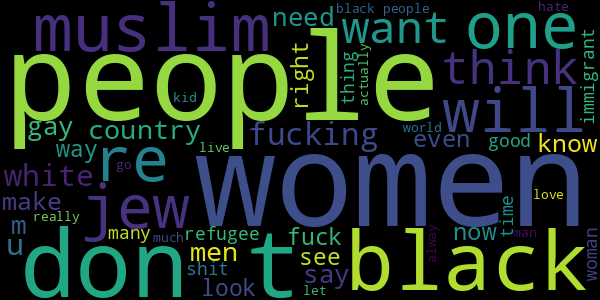

In [ ]:
wordcloud50(df[df['label'] == 'hate']['text']) #hate

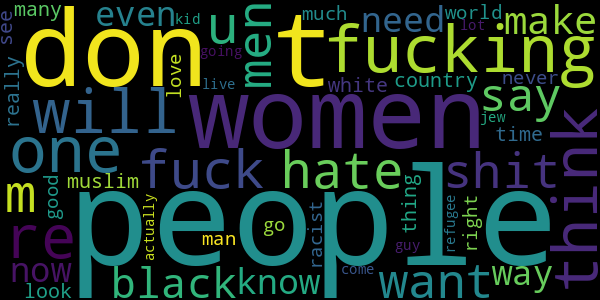

In [ ]:
wordcloud50(df[df['label'] == 'nothate']['text'])

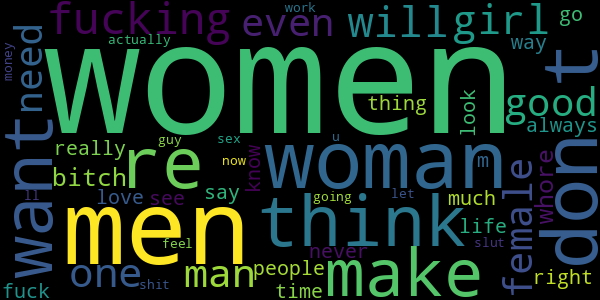

In [ ]:
wordcloud50(df[df['target'] == 'wom']['text'])

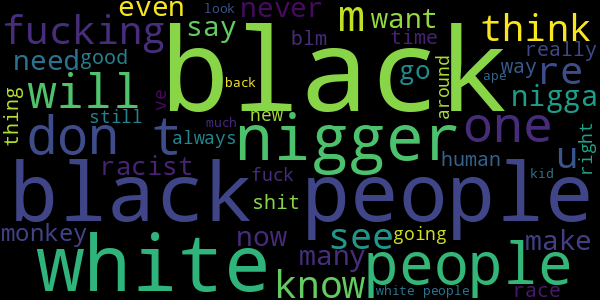

In [ ]:
wordcloud50(df[df['target'] == 'bla']['text'])

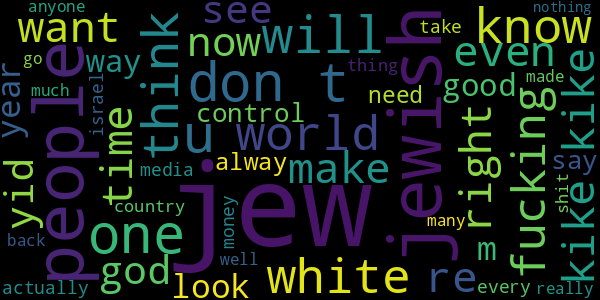

In [ ]:
wordcloud50(df[df['target'] == 'jew']['text'])

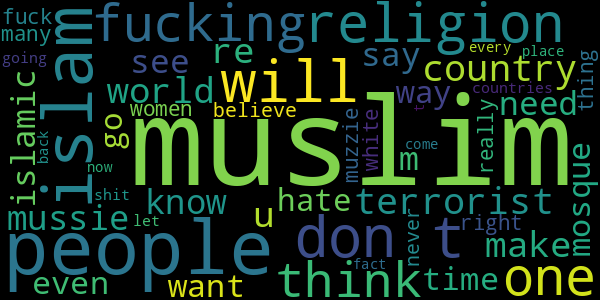

In [ ]:
wordcloud50(df[df['target'] == 'mus']['text'])

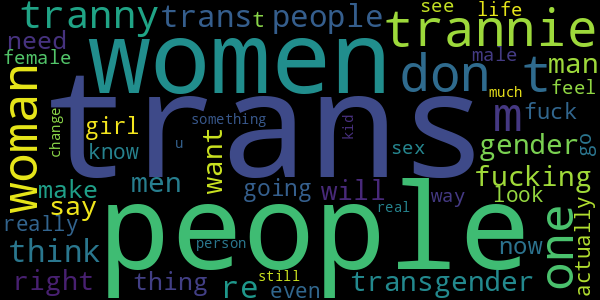

In [ ]:
wordcloud50(df[df['target'] == 'trans']['text'])

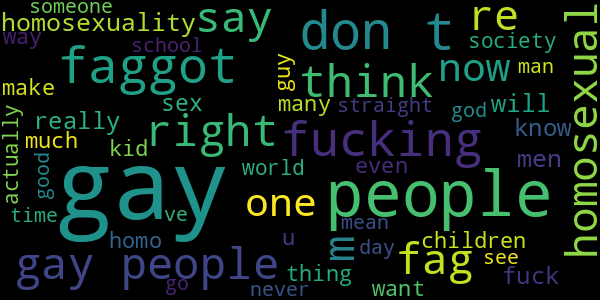

In [ ]:
wordcloud50(df[df['target'] == 'gay']['text'])

#Keybert

In [ ]:
def keybertextract(column):
  long_string = ','.join(list(column.values))
  keywords = kw_model.extract_keywords(long_string, keyphrase_ngram_range=(1, 1))
  bigrams = kw_model.extract_keywords(long_string, keyphrase_ngram_range=(1, 2))
  tfidf = kw_model.extract_keywords(long_string, vectorizer=KeyphraseTfidfVectorizer())
  return keywords, bigrams, tfidf

In [ ]:
kw_model = KeyBERT()

In [ ]:
hatekeywords, hatebigrams, tfidfhate = keybertextract(df[df['label'] == 'hate']['text'])
print(f"Unigram Keywords:", hatekeywords)
print(f"Bigram Keywords:", hatebigrams)
print(f"TfIdf Keywords:", tfidfhate)

Unigram Keywords: [('dalits', 0.38), ('refugeess', 0.3726), ('racists', 0.3674), ('segregated', 0.3623), ('oppression', 0.3607)]
Bigram Keywords: [('abolish racist', 0.5039), ('racists dissalow', 0.4882), ('immigrants dalits', 0.4869), ('refugees gays', 0.4718), ('create racists', 0.4709)]
TfIdf Keywords: [('poor gay vegan refugees lololol', 0.4607), ('fewer racist family members', 0.4487), ('right muslims jews blacks mexicans gays', 0.4414), ('racist homophobic xenophobic', 0.4384), ('racism transphobia homophobia sexism', 0.4362)]


In [ ]:
nohatekeywords, nohatebigrams, tfidfnohate = keybertextract(df[df['label'] == 'nothate']['text'])
print(f"Unigram Keywords:", nohatekeywords)
print(f"Bigram Keywords:", nohatebigrams)
print(f"TfIdf Keywords:", tfidfnohate)

Unigram Keywords: [('pakistanis', 0.4395), ('pakistani', 0.3999), ('pak', 0.3793), ('paki', 0.3759), ('cunts', 0.3756)]
Bigram Keywords: [('hate pakistanis', 0.5693), ('pakistanis vile', 0.5645), ('foreigners disgusting', 0.5472), ('hate pakistani', 0.5451), ('pakistanis cunts', 0.5383)]
TfIdf Keywords: [('fuck niggers kikes trannies faggots spics arabs', 0.538), ('cunt motherfucker nigger paki', 0.5277), ('disgusting racism', 0.4958), ('racism disgusting', 0.4921), ('disgusting cultural difference people', 0.4766)]


In [ ]:
womankeywords, womanbigrams, tfidfwom = keybertextract(df[df['target'] == 'wom']['text'])
print(f"Unigram Keywords:", womankeywords)
print(f"Bigram Keywords:", womanbigrams)
print(f"TfIdf Keywords:", tfidfwom)

Unigram Keywords: [('femaleassholes', 0.3565), ('feminist', 0.351), ('patriarchy', 0.3431), ('feminism', 0.3396), ('feminists', 0.3307)]
Bigram Keywords: [('women inferior', 0.4878), ('feminist bitch', 0.483), ('insult women', 0.4781), ('women inferiority', 0.4722), ('women worthless', 0.4626)]
TfIdf Keywords: [('such total whores feminism', 0.4867), ('feminist bitch', 0.483), ('such total fucking nonsense women', 0.476), ('ridiculous typical feminist', 0.4485), ('nagging thanks feminism', 0.4402)]


In [ ]:
blackpeoplekeywords, blackpeoplebigram, tfidfblackpeople = keybertextract(df[df['target'] == 'bla']['text'])
print(f"Unigram Keywords:", blackpeoplekeywords)
print(f"Bigram Keywords:", blackpeoplebigram)
print(f"TfIdf Keywords:", tfidfblackpeople)

Unigram Keywords: [('niggersow', 0.5607), ('niggers', 0.5514), ('nigger', 0.5336), ('niggeres', 0.5143), ('niggersh', 0.5117)]
Bigram Keywords: [('nigger blacks', 0.6454), ('blacks nigger', 0.6377), ('niggercided blacks', 0.6189), ('niggers african', 0.6165), ('niggers disgusting', 0.6147)]
TfIdf Keywords: [('nigger blacks', 0.6454), ('black people niggers', 0.6303), ('dirty niggers', 0.6006), ('less niggers', 0.5992), ('black people niggas', 0.5977)]


In [ ]:
jewishpeoplekeywords, jewishpeoplebigram, tfidfjewish = keybertextract(df[df['target'] == 'jew']['text'])
print(f"Unigram Keywords:", jewishpeoplekeywords)
print(f"Bigram Keywords:", jewishpeoplebigram)
print(f"TfIdf Keywords:", tfidfjewish)

Unigram Keywords: [('jewssss', 0.524), ('jewsers', 0.5035), ('jewsish', 0.468), ('jews', 0.456), ('nazis', 0.4434)]
Bigram Keywords: [('smell jews', 0.6347), ('kikes jews', 0.5855), ('disgusting jews', 0.5787), ('jews feel', 0.5758), ('controlling jews', 0.5747)]
TfIdf Keywords: [('disgusting jews', 0.5787), ('fucking jew kikes', 0.5713), ('sense jews', 0.564), ('jewish supremacists', 0.5569), ('much jew hatred', 0.5473)]


In [ ]:
muslimpeoplekeywords, muslimpeoplebigram, tfidfmuslim = keybertextract(df[df['target'] == 'mus']['text'])
print(f"Unigram Keywords:", muslimpeoplekeywords)
print(f"Bigram Keywords:", muslimpeoplebigram)
print(f"TfIdf Keywords:", tfidfmuslim)

Unigram Keywords: [('muslimsthey', 0.4626), ('islamophobic', 0.4593), ('muslimsthe', 0.4449), ('islamaphobia', 0.4243), ('muhammed', 0.4136)]
Bigram Keywords: [('dirty muslims', 0.6072), ('muslims disgusting', 0.5925), ('muslims muzzies', 0.5862), ('muslims smell', 0.5742), ('filthy muslims', 0.5732)]
TfIdf Keywords: [('dirty fucking muslims', 0.5987), ('disgusting filthy muslim', 0.5867), ('muslims muzzies', 0.5862), ('muslims smell', 0.5742), ('filthy muslims', 0.5732)]


In [ ]:
transpeoplekeywords, transpeoplebigram, tfidftranspeople = keybertextract(df[df['target'] == 'trans']['text'])
print(f"Unigram Keywords:", transpeoplekeywords)
print(f"Bigram Keywords:", transpeoplebigram)
print(f"TfIdf Keywords:", tfidftranspeople)

Unigram Keywords: [('transwomen', 0.5507), ('transexuals', 0.5361), ('transsexualism', 0.5202), ('transmen', 0.5106), ('transsexual', 0.5071)]
Bigram Keywords: [('issue transwomen', 0.6056), ('transwomen abusive', 0.5949), ('trans freaks', 0.5898), ('transwomen im', 0.5844), ('hate trans', 0.5817)]
TfIdf Keywords: [('other transwomen', 0.5802), ('many trans girls', 0.5783), ('ridiculous trans people', 0.5728), ('trans fuckers', 0.5706), ('trans everyone', 0.5672)]


In [ ]:
gaypeoplekeywords, gaypeoplebigram, tfidfgaypeople = keybertextract(df[df['target'] == 'gay']['text'])
print(f"Unigram Keywords:", gaypeoplekeywords)
print(f"Bigram Keywords:", gaypeoplebigram)
print(f"TfIdf Keywords:", tfidfgaypeople)

Unigram Keywords: [('homophobia', 0.4774), ('gaysing', 0.4728), ('homophobic', 0.4567), ('gayms', 0.4348), ('gaying', 0.425)]
Bigram Keywords: [('support gay', 0.5721), ('gay pride', 0.5692), ('proud gay', 0.565), ('stand gays', 0.5562), ('supporting gays', 0.5417)]
TfIdf Keywords: [('gay pride', 0.5692), ('proud homosexuality', 0.5393), ('gay pride flags', 0.5147), ('bloody gays', 0.5131), ('gay inclusivity', 0.5111)]


#BerTopic

In [ ]:
hatenew = hate.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.2)) #resample proportionally to target class, saved locally

In [ ]:
uploaded = files.upload() #hatenew.csv
hatenew = pd.read_csv(io.BytesIO(uploaded['hatenew.csv']))

In [4]:
data = hatenew['text'].values.tolist()

In [ ]:
sentences = [sent_tokenize(piece) for piece in data]
sentences = [sentence for doc in sentences for sentence in doc]

# Pre-calculate embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(sentences, show_progress_bar=True)

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

hdbscan_model = HDBSCAN(min_cluster_size=50, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [ ]:
topic_model_new = BERTopic(

  # Pipeline models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  vectorizer_model=KeyphraseTfidfVectorizer(),

  # Hyperparameters
  top_n_words=10,
  verbose=True
)

# Train model
topicsnew, probsnew = topic_model_new.fit_transform(sentences, embeddings)

In [8]:
# Show topics
topic_model_new.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1190,-1_people_lesbians_old people_black,"[people, lesbians, old people, black, think, m...","[old people need to die, what the fuck did you..."
1,0,627,0_women_woman_men_bitch,"[women, woman, men, bitch, whore, whores, bitc...","[maybe i m sexist because women are dumb, all ..."
2,1,550,1_black_black people_blacks_white,"[black, black people, blacks, white, people, w...","[white people own black people, why are black ..."
3,2,288,2_jews_jewish_jew_jewish people,"[jews, jewish, jew, jewish people, hitler, isr...","[jews are flthy, jews are stingy, the jews can..."
4,3,252,3_muslims_muslim_islam_religion,"[muslims, muslim, islam, religion, mosques, no...","[genoside all muslims, muslims should not be a..."
5,4,235,4_gay_gays_gay people_gay men,"[gay, gays, gay people, gay men, homosexuality...","[why are gay people always so bitter, gay peop..."
6,5,229,5_chinese_asian_asians_chinese people,"[chinese, asian, asians, chinese people, china...","[chinese are great at being revolting, get rid..."
7,6,213,6_immigrants_foreigners_immigration_country,"[immigrants, foreigners, immigration, country,...","[immigrants should be buried alive, immigrants..."
8,7,212,7_trans_trans people_transgender_gender,"[trans, trans people, transgender, gender, peo...","[trans people are insignificant, trans people ..."
9,8,120,8_539s_retards_fag_j3ws,"[539s, retards, fag, j3ws, chads, sh, cunt, mi...","[539s are disgusting, cunt this is a pathetic ..."


In [9]:
topic_labels = topic_model_new.generate_topic_labels(nr_words=1,topic_prefix=False,word_length=10,separator=", ")
topic_model_new.set_topic_labels(topic_labels)

In [10]:
topic_model_new.visualize_barchart(n_words=10, width=300, height=300, top_n_topics=14, custom_labels= True)

In [11]:
topic_model_new.visualize_topics()

In [12]:
similar_topics, similarity = topic_model_new.find_topics("woman", top_n=5)
topic_model_new.get_topic(similar_topics[0])

[('women', 0.11175589027352029),
 ('woman', 0.05389260342880012),
 ('men', 0.04537525585474492),
 ('bitch', 0.024885244155857324),
 ('whore', 0.022233704764586668),
 ('whores', 0.021656945657817298),
 ('bitches', 0.019371503799598705),
 ('attention', 0.019059881718946313),
 ('female', 0.017292863595207503),
 ('man', 0.017008603683077383)]

In [ ]:
topic_model_new.save("my_model_3", serialization="pickle")

2023-12-20 18:25:19,159 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.
